In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def draw_graph(m):
    m = np.matrix(m)
    G = nx.from_numpy_array(m)
    nx.draw_kamada_kawai(G,with_labels = True)
    

In [3]:
def get_nbs(m,v):
    nbs = []
    for i in range(len(m)):
        if(m[v][i] == 1):
            nbs.append(i)
    return nbs

def flip(x):
    return (x+1)%2
    
m1 = [[0,1,0,1],[1,0,1,1],[0,1,0,0],[1,1,0,0]]
z_str1 = [0 for i in m1]

def z(m,v,z_str):
    z_str[v] = flip(z_str[v])

def x(m,v,z_str):
    for i in get_nbs(m,v):
        z(m,i,z_str)
        
def y(m,v,z_str):
    x(m,v,z_str)
    z(m,v,z_str)

def id(m,v,z_str):
    pass

def add_error(m,bit_str,z_str,p_e):
    for i in bit_str:
        np.random.choice([x,y,z,id],p=[p_e/3,p_e/3,p_e/3,1-p_e])(m,i,z_str)

add_error(m1,z_str1,z_str1,0.5)
print(z_str1)
        

[1, 1, 1, 0]


[[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]]


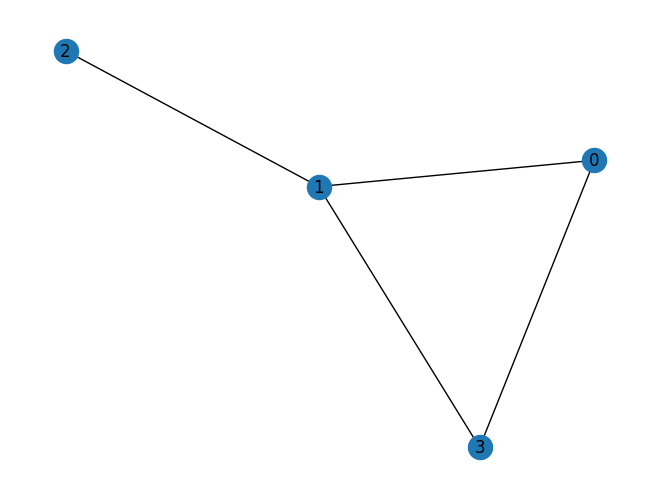

In [4]:
def cz(m,a,b,z_str,p_e):
    m[a][b] = flip(m[a][b])
    m[b][a] = m[a][b]
    add_error(m,[a,b],z_str,p_e)

def z_meas(m,v,z_str,p_e):
    nbs = get_nbs(m,v)
    for i in nbs:
        m[i][v] = flip(m[v][i])
        m[v][i] = m[i][v]
    add_error(m,[v]+nbs,z_str,p_e)

def lc(m,v,z_str,p_e):
    nbs = get_nbs(m,v)
    for i in range(len(nbs)):
        for j in range(i+1,len(nbs)):
            m[nbs[i]][nbs[j]] = flip(m[nbs[i]][nbs[j]])
            m[nbs[j]][nbs[i]] = m[nbs[i]][nbs[j]]
    add_error(m,[v]+nbs,z_str,p_e)
        
print(m1)
draw_graph(m1)    

In [5]:
def sc_build_ghz(n,p_e):
    n = n-1
    m = [[0 for i in range(2*n)] for j in range(2*n)]
    err_str = [0 for i in m]
    
    for i in range(n):
        cz(m,i,n+i,err_str,p_e)
    #draw_graph (m)

    for i in range(1,n):
        cz(m,0,i,err_str,p_e)
    #draw_graph (m)

    for i in range(1,n):
        lc(m,i,err_str,p_e)
    #draw_graph (m)

    for i in range(1,n):
        cz(m,0,i,err_str,p_e)
    #draw_graph (m)

    lc(m,0,err_str,p_e)
    #draw_graph(m)

    for i in range(1,n):
        z_meas(m,i,err_str,p_e)
    #draw_graph(m)

    err_str = [err_str[0]]+err_str[n:]
    return 1 if err_str == [0]*(n+1) else 0

#print(sc_build_ghz(3))

all_sum_sc = 0
for i in range(100):
    all_sum_sc += sc_build_ghz(5,0.05)
print(all_sum_sc/100)

0.24


In [6]:
def cn_build_ghz(n,p_e):
    m = [[0 for i in range(n)] for j in range(n)]
    err_str = [0 for i in m]
    
    for i in range(n):
        for j in range(i):
            cz(m,i,j,err_str,p_e)

    for v in range(n):
        nbs = get_nbs(m,v)
        for i in nbs:
            m[i][v] = flip(m[v][i])
            m[v][i] = m[i][v]
        add_error(m,[v]+nbs,err_str,p_e)
        
    return 1 if err_str == [0]*n else 0

#print(cn_build_ghz(4))

all_sum_cn = 0
for i in range(100):
    all_sum_cn += cn_build_ghz(5,0.05)
print(all_sum_cn/100)
    

0.29


SC: 1.0
CN: 1.0
SC: 0.16
CN: 0.0
SC: 0.03
CN: 0.0
SC: 0.01
CN: 0.0
SC: 0.01
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0
SC: 0.0
CN: 0.0


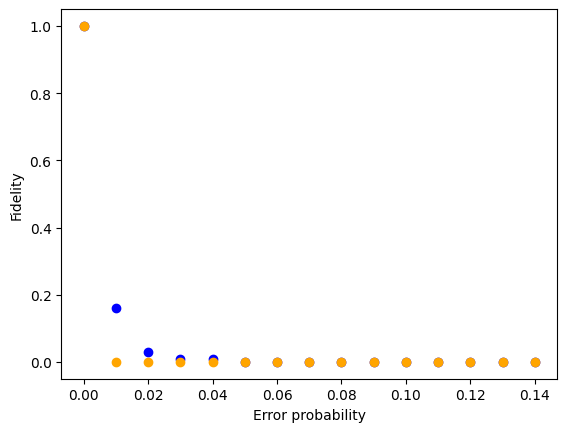

In [14]:
for p in range(0,15):
    p = p/100
    all_sum_sc = 0
    for i in range(100):
        all_sum_sc += sc_build_ghz(20,p)
    print("SC: " + str(all_sum_sc/100))
    plt.scatter(p,all_sum_sc/100,color = 'blue')
    all_sum_cn = 0
    for i in range(100):
        all_sum_cn += cn_build_ghz(20,p)
    print("CN: " + str(all_sum_cn/100))
    plt.scatter(p,all_sum_cn/100, color = 'orange')
    plt.xlabel("Error probability")
    plt.ylabel("Fidelity")

In [ ]:
for p in range(0,15):  
    p = p/100
    all_sum_cn = 0
    for i in range(1000):
        all_sum_cn += cn_build_ghz(10,p)
    print("CN: " + str(all_sum_cn/10))
    plt.scatter(p,all_sum_cn/10, color = 'orange')